In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler

import seaborn as sns

In [29]:
df = pd.read_csv('../data/raw/train.csv')
print("The data is read.")

The data is read.


In [30]:
df.shape

(1460, 81)

## Outlier Handling

<AxesSubplot:xlabel='SalePrice'>

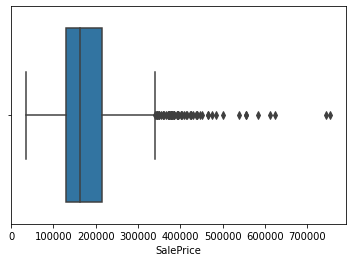

In [31]:
sns.boxplot(x = df['SalePrice'])

In [32]:
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)
IQR = q3 - q1

In [33]:
new_bound = q3 + 3*IQR

In [34]:
df.drop(df[df.SalePrice > new_bound].index, axis = 0, inplace = True)

In [35]:
df.shape

(1448, 81)

<AxesSubplot:xlabel='SalePrice'>

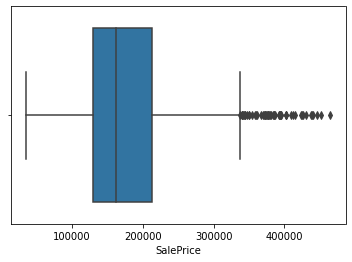

In [36]:
sns.boxplot(x = df['SalePrice'])

## Removing columns

In [37]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [38]:
null_val = df.isnull().sum()
null_val = null_val[null_val > 0.2*1148]
null_val.sort_values(inplace = True)

In [39]:
null_val

LotFrontage     258
FireplaceQu     690
Fence          1169
Alley          1357
MiscFeature    1394
PoolQC         1442
dtype: int64

In [40]:
numeric_features.corr().SalePrice.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.800000
GrLivArea        0.679068
GarageCars       0.653663
GarageArea       0.632507
TotalBsmtSF      0.594397
1stFlrSF         0.584448
YearBuilt        0.556740
FullBath         0.552082
YearRemodAdd     0.534765
GarageYrBlt      0.508040
TotRmsAbvGrd     0.502738
Fireplaces       0.461581
MasVnrArea       0.433622
BsmtFinSF1       0.364725
LotFrontage      0.336667
WoodDeckSF       0.334476
OpenPorchSF      0.325409
2ndFlrSF         0.287455
HalfBath         0.278858
LotArea          0.252031
BsmtFullBath     0.242846
BsmtUnfSF        0.211252
BedroomAbvGr     0.164610
ScreenPorch      0.081308
MoSold           0.079185
3SsnPorch        0.055720
PoolArea         0.033403
BsmtFinSF2      -0.011770
MiscVal         -0.019849
BsmtHalfBath    -0.031552
YrSold          -0.034292
Id              -0.034666
LowQualFinSF    -0.060257
OverallCond     -0.079676
MSSubClass      -0.086540
EnclosedPorch   -0.128520
KitchenAbvGr    -0.143610
Name: SalePr

In [41]:
arr = []

In [42]:
corr_m = numeric_features.corr()
corr_m = corr_m['SalePrice'].sort_values(ascending = False)
poor_cor = corr_m[(corr_m.values < 0.35) & (corr_m.values > -0.03)]
arr = np.append(arr, poor_cor.index.to_list())

In [43]:
arr

array(['LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
       'ScreenPorch', 'MoSold', '3SsnPorch', 'PoolArea', 'BsmtFinSF2',
       'MiscVal'], dtype='<U32')

In [17]:
to_remove = ['GarageCars','1stFlrSF','GrLivArea','FullBath','LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
       'ScreenPorch', 'MoSold', '3SsnPorch', 'PoolArea', 'BsmtFinSF2',
       'MiscVal', 'BsmtHalfBath', 'YrSold', 'Id', 'LowQualFinSF',
       'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr','LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC']

In [18]:
df.drop(to_remove,axis = 1,inplace = True)

In [19]:
numeric_col = df.select_dtypes(include = [np.number]).columns.to_list()
num_col_x = numeric_col[:-1]
num_col_y = numeric_col[-1]
scaler_x = StandardScaler()
scaled_x_df = scaler_x.fit_transform(df[num_col_x])
scaler_y = StandardScaler()
scaled_y_df = scaler_y.fit_transform(df[num_col_y].values.reshape(-1, 1))

df[num_col_x],df[num_col_y] = scaled_x_df, scaled_y_df

In [20]:
df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,1.001096,RFn,0.369164,TA,TA,Y,WD,Normal,0.436537
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,-0.092989,RFn,-0.046740,TA,TA,Y,WD,Normal,0.054391
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,0.920052,RFn,0.652735,TA,TA,Y,WD,Normal,0.648840
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,0.798487,Unf,0.813425,TA,TA,Y,WD,Abnorml,-0.532981
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,0.879531,RFn,1.730303,TA,TA,Y,WD,Normal,1.023909


## Categorical features encoding

In [21]:
cat_col = df.select_dtypes(include = ['object']).columns.to_list()

In [22]:
df[cat_col].dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [27]:
df['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1448, dtype: object

In [23]:
cat_encoder = { }

for i in cat_col:
    print(df[i])
    encoder = LabelEncoder()
    df[i]= encoder.fit_transform(df[i])
    cat_encoder[i]= encoder

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1448, dtype: object
0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
1455    Pave
1456    Pave
1457    Pave
1458    Pave
1459    Pave
Name: Street, Length: 1448, dtype: object
0       Reg
1       Reg
2       IR1
3       IR1
4       IR1
       ... 
1455    Reg
1456    Reg
1457    Reg
1458    Reg
1459    Reg
Name: LotShape, Length: 1448, dtype: object
0       Lvl
1       Lvl
2       Lvl
3       Lvl
4       Lvl
       ... 
1455    Lvl
1456    Lvl
1457    Lvl
1458    Lvl
1459    Lvl
Name: LandContour, Length: 1448, dtype: object
0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
1455    AllPub
1456    AllPub
1457    AllPub
1458    AllPub
1459    AllPub
Name: Utilities, Length: 1448, dtype: object
0       Inside
1          FR2
2       Inside
3       Corner
4          FR2
         .

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [29]:
df[cat_col].dtypes

MSZoning          int64
Street            int64
LotShape          int64
LandContour       int64
Utilities         int64
LotConfig         int64
LandSlope         int64
Neighborhood      int64
Condition1        int64
Condition2        int64
BldgType          int64
HouseStyle        int64
RoofStyle         int64
RoofMatl          int64
Exterior1st       int64
Exterior2nd       int64
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [30]:
cat_encoder

{'MSZoning': LabelEncoder(),
 'Street': LabelEncoder(),
 'LotShape': LabelEncoder(),
 'LandContour': LabelEncoder(),
 'Utilities': LabelEncoder(),
 'LotConfig': LabelEncoder(),
 'LandSlope': LabelEncoder(),
 'Neighborhood': LabelEncoder(),
 'Condition1': LabelEncoder(),
 'Condition2': LabelEncoder(),
 'BldgType': LabelEncoder(),
 'HouseStyle': LabelEncoder(),
 'RoofStyle': LabelEncoder(),
 'RoofMatl': LabelEncoder(),
 'Exterior1st': LabelEncoder(),
 'Exterior2nd': LabelEncoder()}

In [ ]:
missing = df.isnull().sum().sort_values(ascending = False)
print(missing[missing > 0])

In [ ]:
df.dropna(inplace = True)

In [ ]:
numeric_col = df.select_dtypes(include = [np.number]).columns.to_list()
num_col_x = numeric_col[:-1]
num_col_y = numeric_col[-1]

In [ ]:
print(num_col_x)
print(num_col_y)

In [ ]:
print(numeric_col)

In [ ]:
df.head()

In [ ]:
df[num_col_y].values

In [ ]:
df.head()

In [ ]:
df.to_csv("../data/processed/clean_train_data.csv", index = False)

In [ ]:
import pickle

In [ ]:
file = open('../models/data-cleaning-models/cat_encoder.pkl', 'wb')
pickle.dump(cat_encoder, file)

In [17]:
file1 = open('../models/data-cleaning-models/scaler_x.pkl', 'wb')
pickle.dump(cat_encoder, file1)

file2 = open('../models/data-cleaning-models/scaler_y.pkl', 'wb')
pickle.dump(cat_encoder, file2)

NameError: name 'pickle' is not defined